In [1]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB

In [2]:
def loadData(path):
    data=pd.read_csv(path)
    data.drop(labels=["age","afftype", "melanch","inpatient","marriage","work"],axis=1,inplace=True)
    df = data[["gender","madrs1","madrs2","Mean_MeanAct","Mean_Q99Act","Std_MeanAct","Std_Q99Act"]]
    X_train = df.to_numpy()
    Y_train = []
    for n in data[["number"]].to_numpy():
        if "control" in n[0]:
            Y_train.append(0)
        elif "condition" in n[0]:
            Y_train.append(1)
    Y_train = np.asarray(Y_train) 
    return X_train,Y_train


Support Vector Machine Data 1


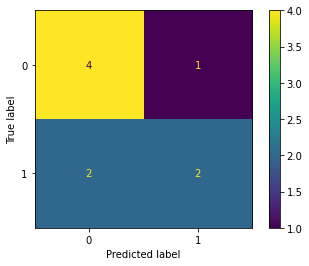

Accuracy : 0.6666666666666666
Precision : 0.6666666666666666
Recall : 0.5
F1_Score : 0.5714285714285715
Specificity : 0.8


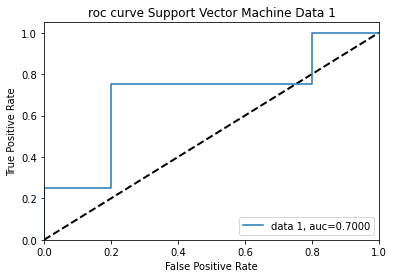


[1 1 1 1 0 0 0 0 0]
[0 0 1 1 0 1 0 0 0]
[0.4388542  0.40745106 0.51084309 0.48296708 0.42269627 0.5
 0.31920829 0.41965148 0.4318558 ]

Extra Tree Classifier Data 1


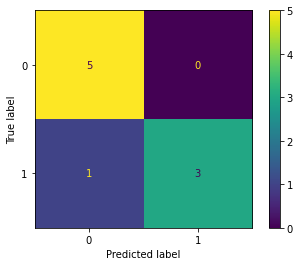

Accuracy : 0.8888888888888888
Precision : 1.0
Recall : 0.75
F1_Score : 0.8571428571428571
Specificity : 1.0


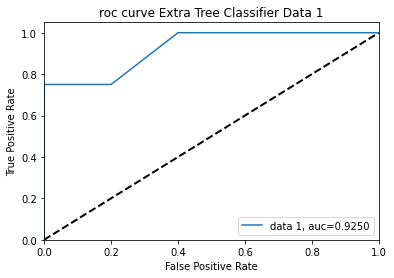


[1 1 1 1 0 0 0 0 0]
[1 0 1 1 0 0 0 0 0]
[0.9 0.3 0.8 0.9 0.4 0.1 0.  0.2 0.3]

Tree Data 1


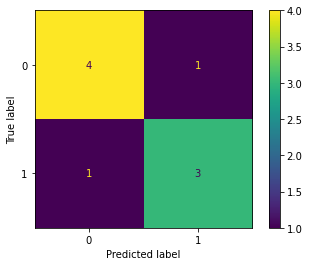

Accuracy : 0.7777777777777778
Precision : 0.75
Recall : 0.75
F1_Score : 0.75
Specificity : 0.8


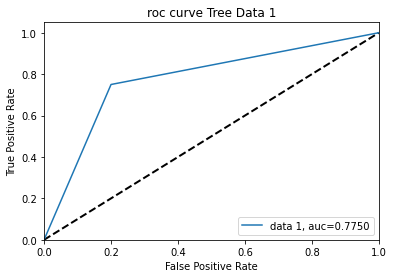


[1 1 1 1 0 0 0 0 0]
[1 0 1 1 1 0 0 0 0]
[1. 0. 1. 1. 1. 0. 0. 0. 0.]

KNeighbors Classifier Data 1


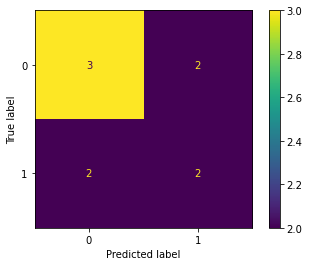

Accuracy : 0.5555555555555556
Precision : 0.5
Recall : 0.5
F1_Score : 0.5
Specificity : 0.6


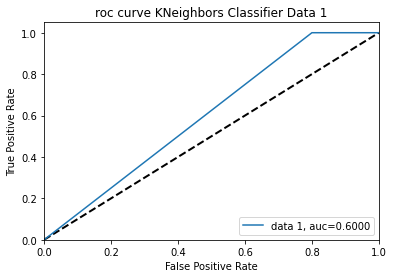


[1 1 1 1 0 0 0 0 0]
[0 0 1 1 1 1 0 0 0]
[0.33333333 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667
 0.         0.33333333 0.33333333]

Random Forest Classifier Data 1


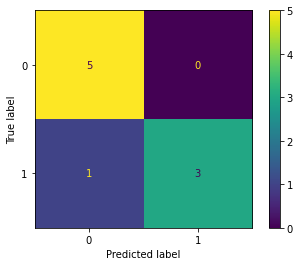

Accuracy : 0.8888888888888888
Precision : 1.0
Recall : 0.75
F1_Score : 0.8571428571428571
Specificity : 1.0


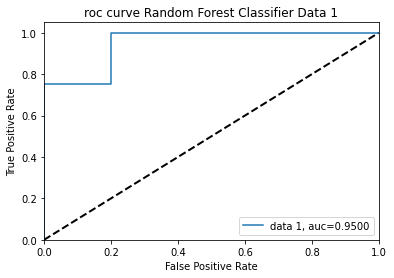


[1 1 1 1 0 0 0 0 0]
[1 0 1 1 0 0 0 0 0]
[0.87107131 0.35252315 0.66263338 0.88469476 0.49960583 0.16979094
 0.03016064 0.13774747 0.21187982]

Ridge Classifier Data 1


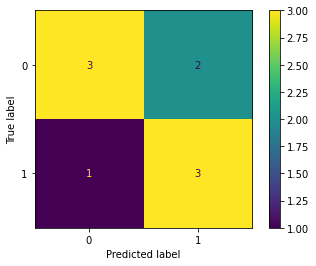

Accuracy : 0.6666666666666666
Precision : 0.6
Recall : 0.75
F1_Score : 0.6666666666666665
Specificity : 0.6


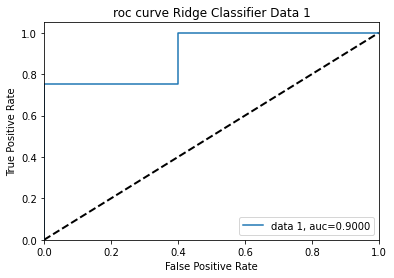


[1 1 1 1 0 0 0 0 0]
[1 0 1 1 1 0 0 0 1]
[ 1.2510134  -0.11948624  0.7191793   1.04545346  0.15540811 -0.78085342
 -1.55680108 -0.20330617  0.12836355]

Ridge Classifier CV Data 1


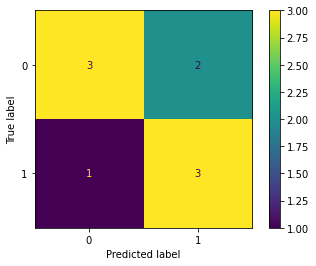

Accuracy : 0.6666666666666666
Precision : 0.6
Recall : 0.75
F1_Score : 0.6666666666666665
Specificity : 0.6


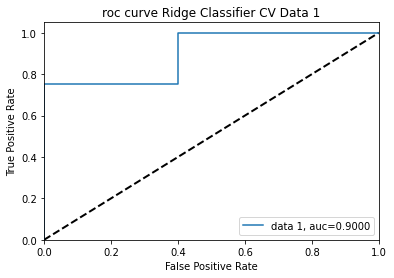


[1 1 1 1 0 0 0 0 0]
[1 0 1 1 1 0 0 0 1]
[ 1.2510134  -0.11948624  0.7191793   1.04545346  0.15540812 -0.78085341
 -1.55680109 -0.20330617  0.12836355]

Naive Bayes Data 1


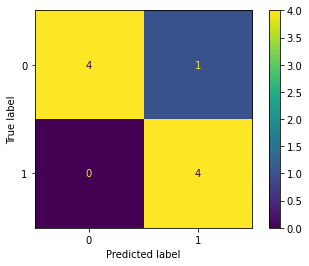

Accuracy : 0.8888888888888888
Precision : 0.8
Recall : 1.0
F1_Score : 0.888888888888889
Specificity : 0.8


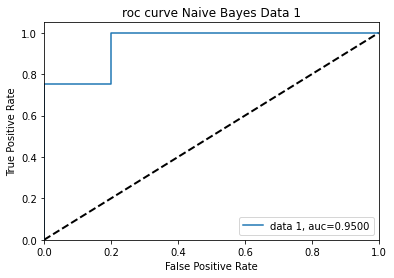


[1 1 1 1 0 0 0 0 0]
[1 1 1 1 0 0 0 0 1]
[9.99999659e-01 7.17710861e-01 9.89901755e-01 9.99998293e-01
 1.26059362e-01 2.10218369e-04 5.98404487e-07 3.42820665e-01
 8.52764584e-01]



In [3]:
set = 2
X_train,Y_train = loadData(f"fold5/fold{set}/train.csv")
X_val,Y_val = loadData(f"fold5/fold{set}/validate.csv")
X_test,Y_test = loadData(f"fold5/fold1/test.csv")

svm_al = svm.SVC(probability=True)
tree_al = tree.DecisionTreeClassifier()
extra_tree = BaggingClassifier(ExtraTreeClassifier(random_state=0), random_state=0)
knn_al = KNeighborsClassifier(n_neighbors=3)
forest = RandomForestClassifier(max_depth=2, random_state=0)
ridge = RidgeClassifier()
ridgeCV = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
naive = GaussianNB()
#naive bayes
#

classifiers = [('Support Vector Machine', svm_al),
                ('Extra Tree Classifier', extra_tree),   
                ('Tree', tree_al),
                ('KNeighbors Classifier', knn_al),
                ('Random Forest Classifier', forest),
                ('Ridge Classifier', ridge),
                ('Ridge Classifier CV', ridgeCV),
                ('Naive Bayes',naive)]

for clf_name, clf in classifiers:
    clf = clf
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_pred, Y_val) 
    cm = confusion_matrix(Y_val, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
    disp.plot()
    print(f"{clf_name} Data {set}")
    plt.show()

    TN, FP, FN, TP = cm.ravel()

    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    Specificity = TN/(TN+FP)

   
    print(f"Accuracy : {Accuracy}")
    print(f'Precision : {Precision}')
    print(f'Recall : {Recall}')
    print(f'F1_Score : {F1_Score}')
    print(f'Specificity : {Specificity}')
    if (clf_name == 'Ridge Classifier') or (clf_name == 'Ridge Classifier CV'):
        y_pred_proba = clf.decision_function(X_val)
    else:    
        y_pred_proba = clf.predict_proba(X_val)[::,1]
    fpr, tpr,_  = roc_curve(Y_val,  y_pred_proba)
    auc = roc_auc_score(Y_val, y_pred_proba)
    fig, ax = plt.subplots(1, 1)
    ax.set_title(f'roc curve {clf_name} Data {set}')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.plot(fpr,tpr,label=f"data {set}, auc={auc:.4f}")
    plt.legend(loc=4)
    plt.show()
    print()
    print(Y_val)
    print(y_pred)
    print(y_pred_proba)
    #print(metrics.classification_report(Y_test,y_pred))
    print()
    #print(y_pred_proba)
    #print(Y_val)
    

In [4]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
y_pred_proba

array([9.99999659e-01, 7.17710861e-01, 9.89901755e-01, 9.99998293e-01,
       1.26059362e-01, 2.10218369e-04, 5.98404487e-07, 3.42820665e-01,
       8.52764584e-01])

In [6]:
Y_val

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [7]:
X_train1 = pd.DataFrame(X_train)
X_train1

,0,1,2,3,4,5,6
0,2.0,19.0,19.0,152.199630,1248.365333,59.218240,537.750628
1,2.0,24.0,11.0,211.280738,1538.777368,80.924414,528.810407
2,1.0,24.0,25.0,280.810714,1605.270000,61.577770,287.349708
3,1.0,18.0,15.0,194.754861,1428.765000,38.794611,153.984219
4,1.0,24.0,25.0,295.975588,1651.887692,148.639974,401.224692
5,2.0,20.0,16.0,200.443750,1804.810000,95.169158,745.719622
6,2.0,28.0,21.0,296.403373,1691.552143,84.898469,256.541836
7,1.0,24.0,24.0,130.193472,1250.976000,64.907332,317.950240
8,2.0,25.0,21.0,152.202579,1150.928571,63.119931,315.606819
9,2.0,14.0,18.0,110.199752,1021.992857,60.377039,367.810858
